# Real Estate Classification

Ames, Iowa dataset
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview


## Problem Statement:  
#### How accurately can we classify whether a house is of high or low quality based on quantitative and qualitative descriptions of its features?

This notebook shows data processing and modeling to answer this classification problem.  Single models attempted were Decision Trees, Logistic Regression (with and without regularization), and a Support Vector Machine.  Ensemble methods included a Hard and Soft Voting classifier (with the best Tree, Logistic Regression, and Support Vector Machine), and Random Forest. 


### Configure Notebook

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
%matplotlib inline

In [55]:
pd.set_option('display.max_columns', None)

### Import Preprocessing Tools

In [56]:
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Import Datasets

In [57]:
df1 = pd.read_csv('train.csv')

In [58]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [59]:
df1.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [60]:
df1.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [61]:
df2 = pd.read_csv('test.csv')

In [62]:
df2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [63]:
df2.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [64]:
#df2 does not contain the Sale Price, therefore won't be used

# Preprocessing

In [65]:
#remove response variable from training
y = df1["OverallQual"]
df1.drop(columns=["OverallQual", "Id"], inplace = True)

In [66]:
df1.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 79, dtype: object

### Identify columns by type

In [67]:
#Identify columns by type.
numeric = df1.select_dtypes(include=['int64', 'float64']).columns

categorical = df1.select_dtypes(include=['object']).columns

In [68]:
len(numeric)
numeric

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [69]:
len(categorical)
categorical

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

There are many categorical columns with many unique values.  Dimensionality reduction will need to be explored later.

In [70]:
#NUMERIC PIPELINE: 
numeric_pipe = Pipeline(
    [('imputer', SimpleImputer(strategy='median')), 
     ('scaler', StandardScaler())]
)

In [71]:
#CATEGORICAL PIPELINE
categorical_pipe = Pipeline(
    [('cat_imputer', SimpleImputer(strategy = 'most_frequent')),
     ('encoder', OneHotEncoder())]
)

In [72]:
#use ColumnTransformer

full_transformer = ColumnTransformer(
    transformers = [
        ('numeric', numeric_pipe, numeric),
        ('categorical', categorical_pipe, categorical)
    ]
)

#### Fit Pipeline to Training Data (df1)

In [73]:
df1_processed = full_transformer.fit_transform(df1)

#### Fit Pipeline to Testing Data (df2)

In [74]:
#not using df2 to to missing SalePrice column
#df2_processed = full_transformer.fit_transform(df2)

## Create Response Variable -- Overall Quality

In [75]:
y.replace([1, 2, 3, 4, 5], "low", inplace=True)

In [76]:
y.replace([6, 7, 8, 9, 10], "high", inplace=True)

In [77]:
y = y.replace({"low":0, "high":1})

In [78]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1455    1
1456    1
1457    1
1458    0
1459    0
Name: OverallQual, Length: 1460, dtype: int64

In [79]:
y1 = pd.DataFrame(y)

## Plot distribution of response variable

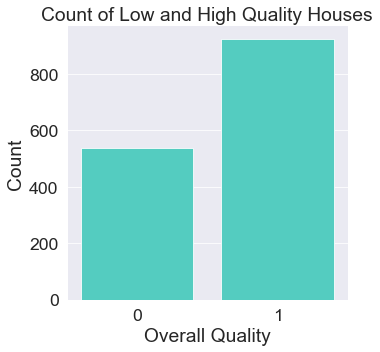

In [149]:
#Plot distribution of y

sns.set_context("paper", font_scale=2) 
sns.catplot(x="OverallQual", kind="count", color="turquoise", data=y1);
plt.title("Count of Low and High Quality Houses")
plt.ylabel("Count")
plt.xlabel("Overall Quality")
sns.set(rc={'figure.figsize':(1.5*11.7,1.5*8.27)})


## split df1_processed into train, test

In [81]:
#for categorical analysis
X_train, X_test, y_train, y_test = train_test_split(df1_processed, y, test_size=0.2, random_state=42)

In [82]:
#break again
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=50)

In [83]:
#len(X_train.columns)

# Implement Decision Tree

In [84]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
tree = DecisionTreeClassifier(criterion='gini')

In [86]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [87]:
from sklearn.tree import export_graphviz

In [88]:
df1.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'Ope

In [89]:
tree_vis = export_graphviz(tree, out_file=None, 
                           filled=True, rounded=True, special_characters=True)

In [105]:
df1_numcat = pd.read_csv("df1_numcat.csv")
df1_numcat.drop(columns = ["OverallQual", "Id"], inplace=True)

#create SalePrice Header for column matching in next step since this came from Regression Task
df1_numcat['SalePrice'] = np.nan


In [106]:
df1_numcat.columns.tolist()

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'Alley_Grvl',
 'Alley_Pave',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_AllPub',
 'Utilities_NoSeWa',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Gtl',
 'LandSlope_Mod',
 'LandS

In [107]:
#drop 'Unnamed: 0'
#df1_numcat.drop(columns=['Unnamed: 0'], inplace=True)
#df1_numcat.drop(columns=["Id"], inplace=True)


In [94]:
#X_train.columns = df1_numcat.columns

In [95]:
#imputer = SimpleImputer(strategy="median")

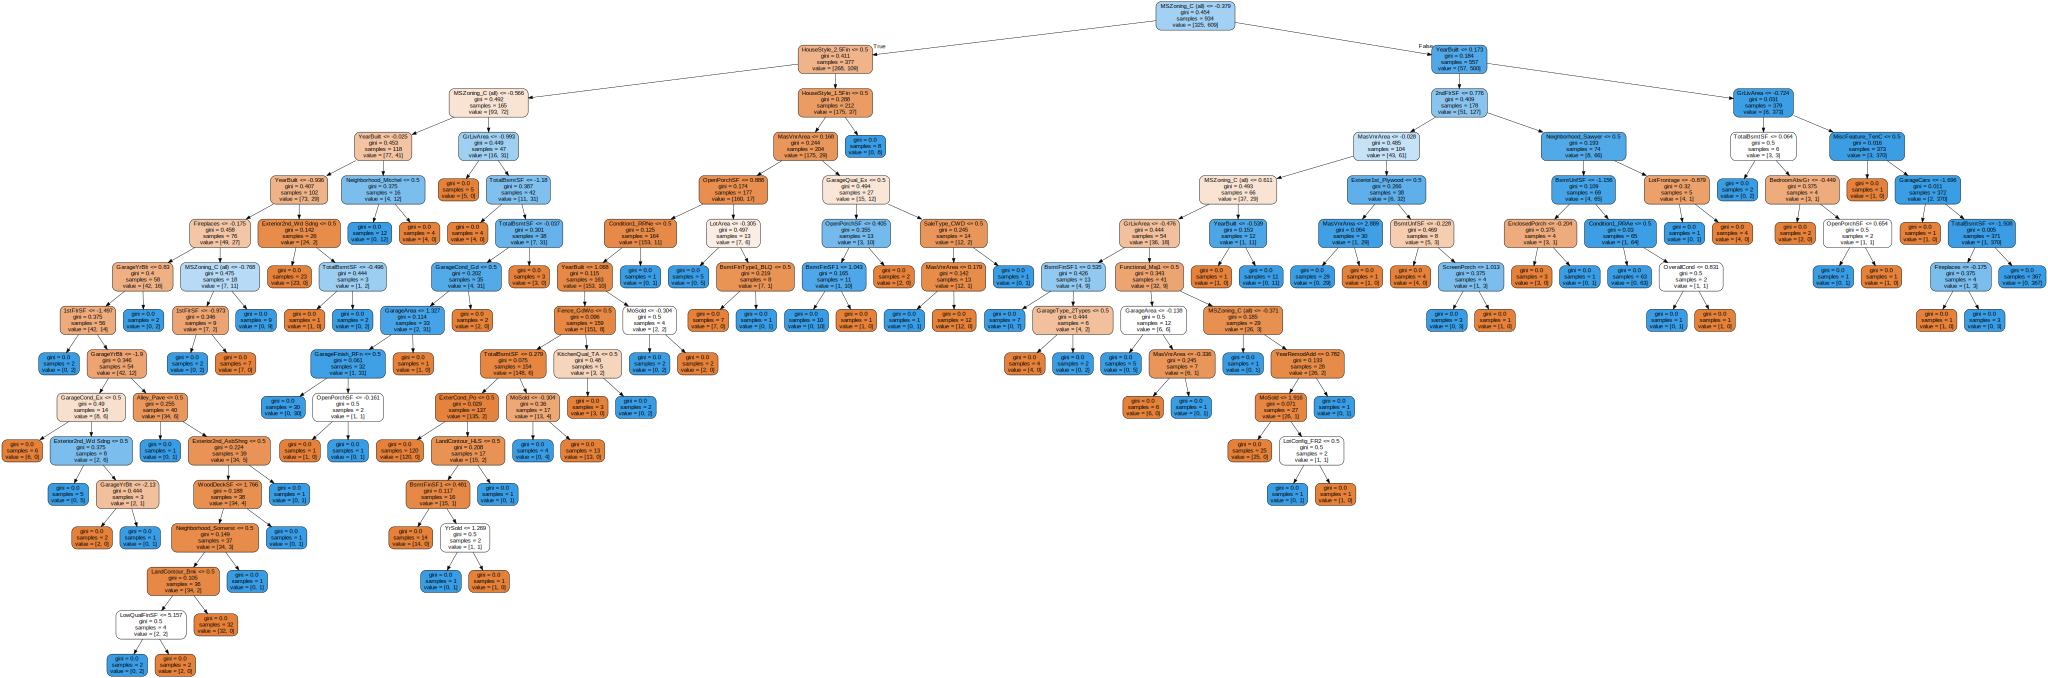

In [108]:
from IPython.display import SVG
from graphviz import Source
Source(export_graphviz(tree, out_file=None, filled = True, rounded = True,feature_names=df1_numcat.columns.tolist()))

In [109]:
from sklearn.metrics import accuracy_score

training_preds = tree.predict(X_train)
testing_preds = tree.predict(X_test)

In [110]:
train_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, testing_preds)

print("Train accuracy: "+ str(train_accuracy))
print("Test accuracy: "+ str(test_accuracy))

Train accuracy: 1.0
Test accuracy: 0.8253424657534246


## Attempt Regularization with Grid Search for Tree Depth and criterion

In [111]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score

In [112]:
decisiontree = DecisionTreeClassifier()

pipe = Pipeline(steps=[('decisiontree', decisiontree)])

criterion = ['gini', 'entropy']
max_depth = [4,6,8,10,12]
 
parameters = dict(decisiontree__criterion=criterion,
                      decisiontree__max_depth=max_depth)
    
clf = GridSearchCV(pipe, parameters)


In [113]:
 clf.fit(X_train, y_train)

/Users/melissaphillips/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('decisiontree',
                                        DecisionTreeClassifier(class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                                               min_samples_leaf=1,
                                                               min_samples_split=2,
                                                               min_weight_fraction_leaf=0

In [114]:
print('Best Criterion:', clf.best_estimator_.get_params()['decisiontree__criterion'])
print('Best max_depth:', clf.best_estimator_.get_params()['decisiontree__max_depth'])
print(clf.best_estimator_.get_params()['decisiontree'])

    # Use Cross Validation To Evaluate Model
CV_Result = cross_val_score(clf, X_train, y_train, cv=4, n_jobs=-1)
print(); print(CV_Result)
print(); print(CV_Result.mean())
print(); print(CV_Result.std())

Best Criterion: gini
Best max_depth: 4
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

[0.78723404 0.82832618 0.8111588  0.81545064]

0.8105424162176971

0.014866179493492167


## Run best tree (depth 4) on Test Set

In [115]:
tree3 = DecisionTreeClassifier(criterion='gini', max_depth=4)
tree3.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [116]:
#check accuracy on validation set

training_preds3 = tree3.predict(X_train)
testing_preds3 = tree3.predict(X_valid)

train_accuracy3 = accuracy_score(y_train, training_preds3)
test_accuracy3 = accuracy_score(y_valid, testing_preds3)

print("Train accuracy: "+ str(train_accuracy3))
print("Valid accuracy: "+ str(test_accuracy3))

Train accuracy: 0.8758029978586723
Valid accuracy: 0.7948717948717948


In [117]:
#check accuracy on test set

training_preds3 = tree3.predict(X_train)
testing_preds3 = tree3.predict(X_test)

train_accuracy3 = accuracy_score(y_train, training_preds3)
test_accuracy3 = accuracy_score(y_test, testing_preds3)

print("Train accuracy: "+ str(train_accuracy3))
print("Test accuracy: "+ str(test_accuracy3))


Train accuracy: 0.8758029978586723
Test accuracy: 0.821917808219178


### Graphviz for best tree

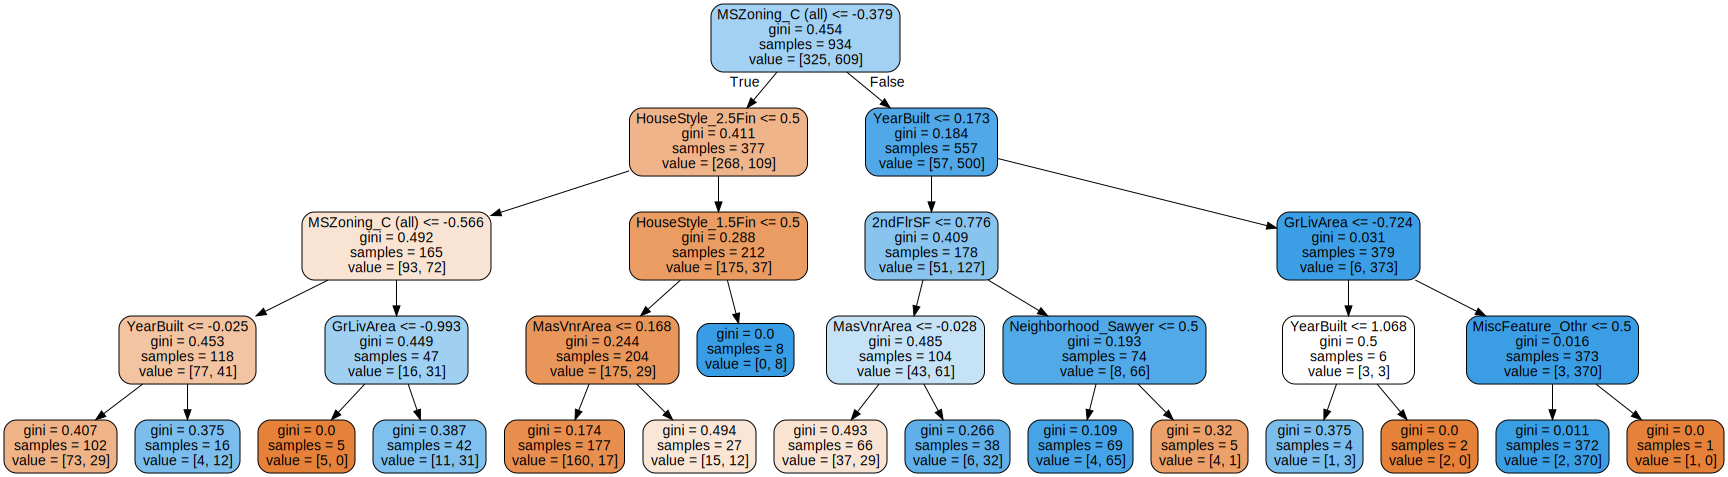

In [120]:
from IPython.display import SVG
from graphviz import Source
Source(export_graphviz(tree3, out_file=None, filled = True, rounded = True,feature_names=df1_numcat.columns.tolist()))

## Logistic Regression

In [121]:
from sklearn.linear_model import LogisticRegression

### Implementation without regularization

In [122]:
lr = LogisticRegression(random_state=0, penalty='none', solver='saga').fit(X_train, y_train)

/Users/melissaphillips/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [123]:
lr.score(X_test, y_test)

0.8424657534246576

### Implementation of Logistic Regression with Grid search for C value (ElasticNet)

In [124]:
logisticreg = LogisticRegression(solver='saga', penalty="elasticnet", )

pipe = Pipeline(steps=[('logisticreg', logisticreg)])

penalty = ['l1', 'l2', 'elasticnet']
C = [0.1,0.5, 1, 5, 10, 20,100,1000]
l1_ratio = [0.01, 0.1, 0.5, 0.7, 0.99]
 
parameters = dict(logisticreg__l1_ratio=l1_ratio,
                      logisticreg__C=C)
    
clf = GridSearchCV(pipe, parameters)


In [125]:
clf.fit(X_train, y_train)

/Users/melissaphillips/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/melissaphillips/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('logisticreg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='warn',
                                                           n_jobs=None,
                                                           penalty='elasticnet',
                                                           random_state=None,
            

In [126]:
print('Best l1_ratio:', clf.best_estimator_.get_params()['logisticreg__l1_ratio'])
print('Best C:', clf.best_estimator_.get_params()['logisticreg__C'])
print(clf.best_estimator_.get_params()['logisticreg'])

Best l1_ratio: 0.5
Best C: 0.1
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.5, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='elasticnet',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)


In [127]:
CV_Result = cross_val_score(clf, X_train, y_train, cv=4, n_jobs=-1)
print(); print(CV_Result)
print(); print(CV_Result.mean())
print(); print(CV_Result.std())


[0.8        0.87553648 0.86266094 0.85407725]

0.8480686695278971

0.028784176201042424


### Evaluate best logistic regression with elasticnet on test set

In [128]:
lr1 = LogisticRegression(random_state=0, solver='saga', penalty='elasticnet', C=0.1, l1_ratio=0.5).fit(X_train, y_train)

/Users/melissaphillips/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [129]:
lr1.score(X_test, y_test)

0.8527397260273972

## Logistic Regression with LASSO

In [130]:
logisticreg = LogisticRegression(solver='saga', penalty="l1")

pipe = Pipeline(steps=[('logisticreg', logisticreg)])

#penalty = ['l1', 'l2', 'elasticnet']
C = [0.1,0.5, 1, 5, 10, 20,100,1000]
#l1_ratio = [0.01, 0.1, 0.5, 0.7, 0.99]
 
parameters = dict(logisticreg__C=C)
    
clf = GridSearchCV(pipe, parameters)


In [131]:
clf.fit(X_train, y_train)

/Users/melissaphillips/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/melissaphillips/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('logisticreg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='warn',
                                                           n_jobs=None,
                                                           penalty='l1',
                                                           random_state=None,
                    

In [133]:
lr1 = LogisticRegression(random_state=0, solver='saga', penalty='l1', C=1).fit(X_train, y_train)

lr1.score(X_test, y_test)

0.8458904109589042

# Support Vector Machines

In [792]:
from sklearn import svm

#### Model with 'rbf' kernel

In [793]:
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

/Users/melissaphillips/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.8561643835616438


#### Model with 'linear' kernel

In [794]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8082191780821918


#### Model with 'poly' kernel

In [795]:
clf = svm.SVC(kernel='poly')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

/Users/melissaphillips/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.5787671232876712


In [796]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
search = GridSearchCV(clf, param_grid, cv=5)
search.fit(X_train, y_train)

/Users/melissaphillips/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/melissaphillips/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/melissaphillips/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/meliss

/Users/melissaphillips/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None, param_grid={'C': [0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

#### Work with 'rbf' kernel and try to implement a Grid Search
used:  https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html

In [797]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [798]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [0.1, 1, 10, 100, 1000]}, 
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['poly'], 'degree': [2, 3, 4, 5]}]

In [799]:
scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_valid, clf.predict(X_valid)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision



/Users/melissaphillips/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/melissaphillips/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/melissaphillips/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/melissaphillips/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will 

Best parameters set found on development set:

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.326 (+/-0.001) for {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.326 (+/-0.001) for {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.824 (+/-0.010) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.326 (+/-0.001) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.839 (+/-0.031) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.823 (+/-0.013) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.816 (+/-0.025) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.839 (+/-0.031) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.802 (+/-0.043) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.815 (+/-0.025) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.792 (+/-0.037) for {'C': 1, 'kernel': 'linear'}
0.788 (+/-0.037) for {'C': 10, 'kernel': 'linear'}
0.779 (+/-0.033) for {'C': 100, 'kernel': 'linear'}
0.779 (+/-0.033) for {'C': 1000, 'kernel': 'linear'}
0.813 (+/-0.028) fo

/Users/melissaphillips/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/melissaphillips/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/melissaphillips/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/meliss

Best parameters set found on development set:

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.500 (+/-0.000) for {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.500 (+/-0.000) for {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.842 (+/-0.008) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.500 (+/-0.000) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.842 (+/-0.021) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.840 (+/-0.013) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.810 (+/-0.038) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.842 (+/-0.021) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.790 (+/-0.007) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.813 (+/-0.017) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.789 (+/-0.016) for {'C': 1, 'kernel': 'linear'}
0.784 (+/-0.020) for {'C': 10, 'kernel': 'linear'}
0.772 (+/-0.026) for {'C': 100, 'kernel': 'linear'}
0.772 (+/-0.026) for {'C': 1000, 'kernel': 'linear'}
0.808 (+/-0.023) for

## Best Support Vector Machine Models

In [800]:
clf = svm.SVC(kernel='rbf', C=1, gamma= 0.001)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8698630136986302


In [801]:
clf = svm.SVC(kernel='rbf', C=10, gamma= 0.001)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8458904109589042


Strong models at 0.87 and 0.845 accuracy.

## Implement Voting Classifier

In [802]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [803]:
clf1 = LogisticRegression(random_state=0, penalty='l1', solver='saga', C=0.8) #49%
clf2 = svm.SVC(kernel='rbf', C=1, gamma= 0.001, probability=True) #85.4
clf3 = DecisionTreeClassifier(criterion='gini', max_depth=4) #52%

In [804]:
eclf1 = VotingClassifier(estimators=[
         ('lr', clf1), ('svm', clf2), ('dc', clf3)], voting='hard')

In [805]:
eclf1 = eclf1.fit(X_train, y_train)

/Users/melissaphillips/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [806]:
y_pred = eclf1.predict(X_valid)
print("Accuracy:",metrics.accuracy_score(y_valid, y_pred))

Accuracy: 0.8418803418803419


In [807]:
eclf2 = VotingClassifier(estimators=[
         ('lr', clf1), ('svm', clf2), ('dc', clf3)], voting='soft',
    flatten_transform=True)

In [808]:
eclf2 = eclf2.fit(X_train, y_train)

/Users/melissaphillips/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [809]:
y_pred = eclf2.predict(X_valid)
print("Accuracy:",metrics.accuracy_score(y_valid, y_pred))

Accuracy: 0.8418803418803419


## Implement Bagging

Pick a single ML model to be the base for your “weak learners.”
Fit a bunch (more is better, but at least 10) of these models, each on a different bootstrapped sample of your training data.**
Aggregate their predictions to make bagged predictions. **

Report validation accuracy for the following; 
1. One model fit on whole dataset 
2. One model fit on bootstrapped sample 
3. Your ensemble


**Your life will be easier if you can do steps 2 and 3 iteratively. Tricky, but very good practice.


In [810]:
#Choose ML model as base
clf = DecisionTreeClassifier(criterion='gini', max_depth=4) #52%

In [811]:
#create bootstrapped sample of training data:
X_train

<934x288 sparse matrix of type '<class 'numpy.float64'>'
	with 73786 stored elements in Compressed Sparse Row format>

In [812]:
X_train.shape

(934, 288)

In [813]:
X_train.toarray().shape

(934, 288)

In [814]:
train_acc = []
test_acc = []

for i in range(1,10):

    ##generate index for samples
    idx = np.random.randint(0, 934, 934)

    ##generate sampled array
    resamples_arr = X_train[idx].toarray()

    ##generate corresponding response
    resamples_y = y_train.iloc[idx]

    ##Fit Decision Tree with bootstrapped sample

    clf.fit(resamples_arr, resamples_y)

    #check accuracy

    training_preds = clf.predict(resamples_arr)
    testing_preds = clf.predict(X_valid)

    train_accuracy = accuracy_score(resamples_y, training_preds)
    test_accuracy = accuracy_score(y_valid, testing_preds)

    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)



In [815]:
df = pd.DataFrame() 

for i in range(1, 10):
##working on implementing voting 
##generate index for samples
    idx = np.random.randint(0, 934, 934)

        ##generate sampled array
    resamples_arr = X_train[idx].toarray()

        ##generate corresponding response
    resamples_y = y_train.iloc[idx]

        ##Fit Decision Tree with bootstrapped sample

    clf = clf.fit(resamples_arr, resamples_y)

        #check accuracy

    df[str(i)] = clf.predict(resamples_arr)
 #   testing_preds = clf.predict(X_valid)


In [816]:
train_acc

[0.880085653104925,
 0.9036402569593148,
 0.8982869379014989,
 0.9057815845824411,
 0.8704496788008566,
 0.8832976445396146,
 0.8950749464668094,
 0.8886509635974305,
 0.867237687366167]

In [817]:
sum(train_acc)/len(train_acc)

0.8880561503687842

In [818]:
test_acc

[0.7863247863247863,
 0.8162393162393162,
 0.782051282051282,
 0.7863247863247863,
 0.7692307692307693,
 0.7393162393162394,
 0.8034188034188035,
 0.7905982905982906,
 0.7905982905982906]

In [819]:
sum(test_acc)/len(test_acc)

0.7849002849002847

In [820]:
#aggregate predictions

for i in range(1,10):

    ##generate index for samples
    idx = np.random.randint(0, 934, 934)

    ##generate sampled array
    resamples_arr = X_train[idx].toarray()

    ##generate corresponding response
    resamples_y = y_train.iloc[idx]

    ##Fit Decision Tree with bootstrapped sample

    clf.fit(resamples_arr, resamples_y)

    #check accuracy

    training_preds = clf.predict(resamples_arr)
    testing_preds = clf.predict(X_valid)

    train_accuracy = accuracy_score(resamples_y, training_preds)
    test_accuracy = accuracy_score(y_valid, testing_preds)

    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)

## Fit and report validation accuracy for the following.
1. A single tree  78%
2. A voting classifier of identical trees (can re-use from earlier) 79%
3. Bagging in sklearn 80%
4. Unbagged random forest in sklearn 81%
5. Bagged random forest in sklearn max_depth 2, max_features 'sqrt' 78.6%
6. Hyperparameter-tuned random forest in sklearn  max_depth 15, max_features 'log2', 83.7% . (lower than voting classifier)

If time, tune the number of weak learners, and report what you find!

With 100 learners, got 85.4% (50, 100, and 500 were the same).  Same as best SVM.
With 1000 learners, got 84.6%

Hard Voting Classifier was 85.89%.


In [821]:
clf1 = DecisionTreeClassifier(criterion='gini', max_depth=4) #52%
clf2 = DecisionTreeClassifier(criterion='gini', max_depth=4) #52%
clf3 = DecisionTreeClassifier(criterion='gini', max_depth=4) #52%

In [822]:
##single tree
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_valid)
print("Accuracy:",metrics.accuracy_score(y_valid, y_pred))

Accuracy: 0.7948717948717948


In [823]:
##Voting Clasifier of identical trees
eclf1 = VotingClassifier(estimators=[
         ('dc1', clf1), ('dc2', clf2), ('dc3', clf3)], voting='hard')

In [824]:
eclf1 = eclf1.fit(X_train, y_train)

In [825]:
y_pred = eclf1.predict(X_valid)
print("Accuracy:",metrics.accuracy_score(y_valid, y_pred))

Accuracy: 0.7991452991452992


In [826]:
##bagging in sklearn

from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(n_estimators=10, random_state=0).fit(X_train, y_train)


In [827]:
clf.score(X_valid, y_valid)

0.8205128205128205

In [828]:
##Unbagged Random Forest in sklearn

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0, bootstrap=False).fit(X_train, y_train)

/Users/melissaphillips/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [829]:
clf.score(X_valid, y_valid)

0.7564102564102564

In [830]:
# Bagged Random Forest in sklearn

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0, bootstrap=True).fit(X_train, y_train)

/Users/melissaphillips/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [831]:
clf.score(X_valid, y_valid)

0.8076923076923077

In [832]:
clf = RandomForestClassifier(max_depth=2, random_state=0, bootstrap=True, max_features='sqrt').fit(X_train, y_train)
clf.score(X_valid, y_valid)

/Users/melissaphillips/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8076923076923077

In [833]:
clf = RandomForestClassifier(max_depth=2, random_state=0, bootstrap=True, max_features='log2').fit(X_train, y_train)
clf.score(X_valid, y_valid)

/Users/melissaphillips/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7435897435897436

In [834]:
#alter max_depth
clf = RandomForestClassifier(max_depth=3, random_state=0, bootstrap=True, max_features='sqrt').fit(X_train, y_train)
clf.score(X_valid, y_valid)

/Users/melissaphillips/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8205128205128205

In [835]:
clf = RandomForestClassifier(max_depth=10, random_state=0, bootstrap=True, max_features='log2').fit(X_train, y_train)
clf.score(X_valid, y_valid)

/Users/melissaphillips/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8205128205128205

In [836]:
clf = RandomForestClassifier(max_depth=5, random_state=0, bootstrap=True, max_features='sqrt').fit(X_train, y_train)
clf.score(X_valid, y_valid)

/Users/melissaphillips/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8034188034188035

## Best Tuned Random Forest:



### Implement a Grid Search

In [616]:
randomf = RandomForestClassifier(random_state=0, bootstrap=True)

pipe = Pipeline(steps=[('randomf', randomf)])

max_depth = [2, 4, 6, 8, 10, 15, 20, 50, 100]
max_features = ['log2', 'sqrt']
n_estimators = [10, 50, 75, 100, 200]
criterion = ['gini', 'entropy']
 
parameters = dict(randomf__max_depth=max_depth,
                      randomf__max_features=max_features,
                     randomf__n_estimators=n_estimators,
                     randomf__criterion = criterion)
    
clf = GridSearchCV(pipe, parameters)


In [617]:
clf.fit(X_train, y_train)

/Users/melissaphillips/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('randomf',
                                        RandomForestClassifier(bootstrap=True,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                                               min_samples_leaf=1,
                                                               min_samples_split=2,
             

In [618]:
#print('Best l1_ratio:', clf.best_estimator_.get_params()['logisticreg__l1_ratio'])
#print('Best C:', clf.best_estimator_.get_params()['logisticreg__C'])
print(clf.best_estimator_.get_params()['randomf'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=50, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


In [619]:
CV_Result = cross_val_score(clf, X_train, y_train, cv=4, n_jobs=-1)
print(); print(CV_Result)
print(); print(CV_Result.mean())
print(); print(CV_Result.std())


[0.81276596 0.86695279 0.84549356 0.86695279]

0.8480412747694275

0.022170530244516717


### Best Model:

In [620]:
clf = RandomForestClassifier(max_depth=50, random_state=0, bootstrap=True, max_features='log2', n_estimators=200).fit(X_train, y_train)
clf.score(X_valid, y_valid)

0.8418803418803419

## Dictionary/Dataframe of Models and Results

In [134]:
d = {'Model Name': ["Tuned DT", "LogReg", "LogLASSO", "LogRegENet", "SVM",
                   "HardVC", "SoftVC", "RandFor"], 
     'Testing Accuracy': [.825,.842, 0.846, 0.853, 0.870, 0.842, 0.825, 0.842]}
df = pd.DataFrame(data=d)

In [135]:
df.head()

,Model Name,Testing Accuracy
0,Tuned DT,0.825
1,LogReg,0.842
2,LogLASSO,0.846
3,LogRegENet,0.853
4,SVM,0.870


In [136]:
#sort dataframe
df.sort_values(by=['Testing Accuracy'], ascending=False, inplace=True)

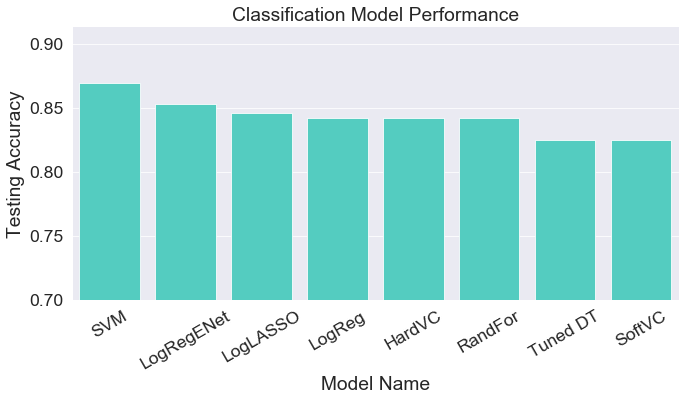

In [150]:
#plt.figure(figsize=(30,10))
sns.set_context("paper", font_scale=2) 
g = sns.catplot(x="Model Name", y="Testing Accuracy", kind="bar", color="turquoise", data=df);
plt.title("Classification Model Performance")
g.set(ylim=(.7, None))
g.set_xticklabels(rotation=30)
g.fig.set_figwidth(12)

#sns.set(rc={'figure.figsize':(3*11.7,3*8.27)})